<a href="https://colab.research.google.com/github/SWARAJkumar/Video-Segmentation/blob/master/video_segmentation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/dbolya/yolact.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q --depth 1 {git_repo_url}
  !pip install -q youtube-dl
  
import sys
sys.path.append(project_name)

from IPython.display import YouTubeVideo

     |████████████████████████████████| 1.8MB 14.1MB/s 


In [3]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  
pretrained_model = 'yolact_resnet50_54_800000.pth'
if not exists(pretrained_model):
  download_from_google_drive('1yp7ZbbDwvMiFJEq4ptVKTYTI2VeRDXl0', pretrained_model)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1207      0 --:--:-- --:--:-- --:--:--  1203
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  121M    0  121M    0     0  49.7M      0 --:--:--  0:00:02 --:--:--  126M


## Segment objects on a test video with SeamSeg

We are going to segment objects on the following youtube video:

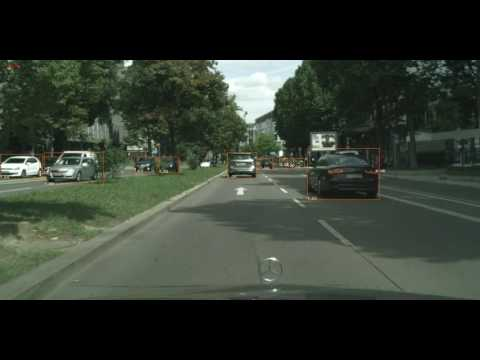

In [9]:
YOUTUBE_ID = 'yNc5N1MOOt4'

YouTubeVideo(YOUTUBE_ID)

Download the above youtube video and segment objects on the first 5 seconds:

In [10]:
!rm -rf youtube.mp4 input.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v={YOUTUBE_ID}
!ffmpeg -y -loglevel panic -i youtube.mp4 -t 10 input.mp4

!cd {project_name} && python eval.py --trained_model=../{pretrained_model} --score_threshold=0.3 --top_k=100 --video=../input.mp4:../pre_output.mp4
# encode with FFMPEG otherwise can't embedd in colab!
!ffmpeg -y -loglevel panic -i pre_output.mp4 output.mp4

[youtube] yNc5N1MOOt4: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 23.76MiB in 00:07
Config not specified. Parsed yolact_resnet50_config from the file name.

/usr/local/lib/python3.6/dist-packages/torch/jit/_recursive.py:152: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.6/dist-packages/torch/jit/_recursive.py:152: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.6/dist-packages/torch/jit/_recursive.py:152: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loadi

Finally, visualize the result:

In [11]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4')

#Output from Mapillary research's SeamSeg paper 
refer - https://arxiv.org/abs/1905.01220
This also gives us panoptic segmentation i.e. combines semantic and instance segmentation for each pixel in the frame

In [7]:
YOUTUBE_ID = 'UX_zO7-IYtw'

YouTubeVideo(YOUTUBE_ID)

#Output form Mask RCNN paper 
refer -  https://arxiv.org/abs/1703.06870

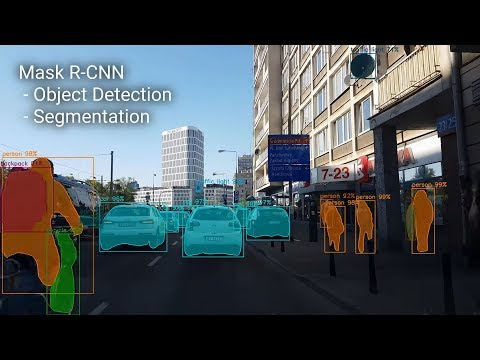

In [8]:
YOUTUBE_ID = 'OOT3UIXZztE'

YouTubeVideo(YOUTUBE_ID)


##Comparitive Analysis  



Using Average precision (AP) (IoU>0.5)  (refer -https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173)


1.   MaskRCNN- 58%
2.   Seamseg by mapillary- 62%
3.   Our work- 43%






